# Spectrophotometry

Cary Varian Spectrophotometer

In [93]:
# force Jupyter to autoreload modules when they have been edited
# this helps keep the iodp module current as it is actively developed.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
import sys
import os
from importlib import reload

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from iodp import utils, spec




In [95]:
# Ensure we are in the Chemistry root folder
if not os.getcwd().endswith("Chemistry"):
    print("Current working directory:", os.getcwd())
    os.chdir("../")
    
print("New current working directory:", os.getcwd())

New current working directory: d:\archive\hd_files\data_analysis\50_laboratory_notebooks\SOD-Laboratory\Chemistry


# Read SPEC .csv files

In [97]:
file = './data/input/SPEC/402_1617A_ammonium.csv'

df = spec.read_spec_csv_file(file, as_dataframe=True, profile_only=False)
df
    


,report_time,method,batch_name,application,operator,instrument,instrument_version_no.,wavelength_(nm),ordinate_mode,sbw_(nm),...,sample_averaging,rsa_fill_time(sec),rsa_delay_time(sec),rsa_auto_return,comments,collection_time,recalculation_time,Sample,F,Readings
0,3/17/2024 5:49:28 AM,C:\Users\daq.SHIP\Desktop\SPEC Data\Ammonium.MAB,C:\Users\daq.SHIP\Desktop\SPEC Data\402\Ammoni...,Advanced Reads 4.20(468),,Cary 300,12.00,640.00,Abs,1.5,...,OFF,30,8,OFF,,3/17/2024 3:56:26 AM,3/17/2024 5:49:28 AM,0,,0.0228
1,3/17/2024 5:49:28 AM,C:\Users\daq.SHIP\Desktop\SPEC Data\Ammonium.MAB,C:\Users\daq.SHIP\Desktop\SPEC Data\402\Ammoni...,Advanced Reads 4.20(468),,Cary 300,12.00,640.00,Abs,1.5,...,OFF,30,8,OFF,,3/17/2024 3:56:26 AM,3/17/2024 5:49:28 AM,50,,0.0212
2,3/17/2024 5:49:28 AM,C:\Users\daq.SHIP\Desktop\SPEC Data\Ammonium.MAB,C:\Users\daq.SHIP\Desktop\SPEC Data\402\Ammoni...,Advanced Reads 4.20(468),,Cary 300,12.00,640.00,Abs,1.5,...,OFF,30,8,OFF,,3/17/2024 3:56:26 AM,3/17/2024 5:49:28 AM,100,,0.0318
3,3/17/2024 5:49:28 AM,C:\Users\daq.SHIP\Desktop\SPEC Data\Ammonium.MAB,C:\Users\daq.SHIP\Desktop\SPEC Data\402\Ammoni...,Advanced Reads 4.20(468),,Cary 300,12.00,640.00,Abs,1.5,...,OFF,30,8,OFF,,3/17/2024 3:56:26 AM,3/17/2024 5:49:28 AM,200,,0.0546
4,3/17/2024 5:49:28 AM,C:\Users\daq.SHIP\Desktop\SPEC Data\Ammonium.MAB,C:\Users\daq.SHIP\Desktop\SPEC Data\402\Ammoni...,Advanced Reads 4.20(468),,Cary 300,12.00,640.00,Abs,1.5,...,OFF,30,8,OFF,,3/17/2024 3:56:26 AM,3/17/2024 5:49:28 AM,400,,0.1024
5,3/17/2024 5:49:28 AM,C:\Users\daq.SHIP\Desktop\SPEC Data\Ammonium.MAB,C:\Users\daq.SHIP\Desktop\SPEC Data\402\Ammoni...,Advanced Reads 4.20(468),,Cary 300,12.00,640.00,Abs,1.5,...,OFF,30,8,OFF,,3/17/2024 3:56:26 AM,3/17/2024 5:49:28 AM,600,,0.1438
6,3/17/2024 5:49:28 AM,C:\Users\daq.SHIP\Desktop\SPEC Data\Ammonium.MAB,C:\Users\daq.SHIP\Desktop\SPEC Data\402\Ammoni...,Advanced Reads 4.20(468),,Cary 300,12.00,640.00,Abs,1.5,...,OFF,30,8,OFF,,3/17/2024 3:56:26 AM,3/17/2024 5:49:28 AM,800,,0.1878
7,3/17/2024 5:49:28 AM,C:\Users\daq.SHIP\Desktop\SPEC Data\Ammonium.MAB,C:\Users\daq.SHIP\Desktop\SPEC Data\402\Ammoni...,Advanced Reads 4.20(468),,Cary 300,12.00,640.00,Abs,1.5,...,OFF,30,8,OFF,,3/17/2024 3:56:26 AM,3/17/2024 5:49:28 AM,1000,,0.2333
8,3/17/2024 5:49:28 AM,C:\Users\daq.SHIP\Desktop\SPEC Data\Ammonium.MAB,C:\Users\daq.SHIP\Desktop\SPEC Data\402\Ammoni...,Advanced Reads 4.20(468),,Cary 300,12.00,640.00,Abs,1.5,...,OFF,30,8,OFF,,3/17/2024 3:56:26 AM,3/17/2024 5:49:28 AM,2000,,0.3694
9,3/17/2024 5:49:28 AM,C:\Users\daq.SHIP\Desktop\SPEC Data\Ammonium.MAB,C:\Users\daq.SHIP\Desktop\SPEC Data\402\Ammoni...,Advanced Reads 4.20(468),,Cary 300,12.00,640.00,Abs,1.5,...,OFF,30,8,OFF,,3/17/2024 3:56:26 AM,3/17/2024 5:49:28 AM,3000,,0.4638


# Exploring SPEC

In [148]:
file = './data/input/SPEC/402_1617A_ammonium.csv'

df = spec.read_spec_csv_file(file, as_dataframe=True, profile_only=True)
df.head(12)

,Sample,F,Readings
0,0,,0.0228
1,50,,0.0212
2,100,,0.0318
3,200,,0.0546
4,400,,0.1024
5,600,,0.1438
6,800,,0.1878
7,1000,,0.2333
8,2000,,0.3694
9,3000,,0.4638


### Applying Linear/Quadratic Regressions

[6276.78811795]
-208.6813741568517
1


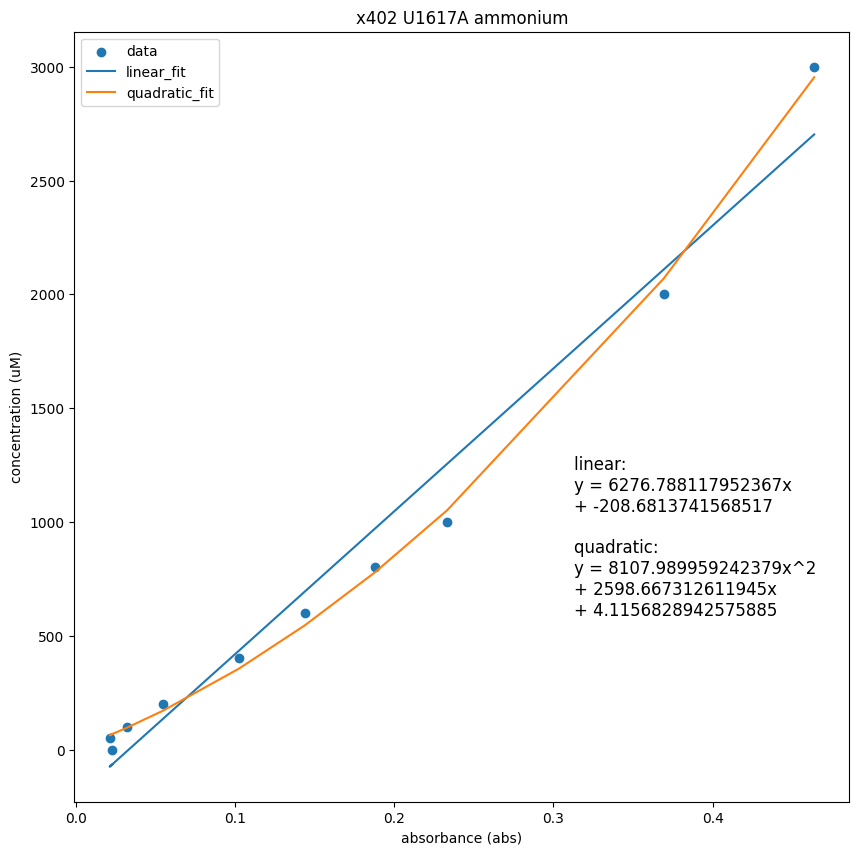

In [230]:
end = 9

# must reshape X input as 2D, even though each record has only one feature (concentration)
concentrations = df.loc[:end,'Sample'].astype(float).values
readings = df.loc[:end,'Readings'].astype(float).values
readings_r = readings.reshape(-1,1)

# Linear Model
model = LinearRegression()

model.fit(
    X = readings_r,
    y = concentrations
    )

print(model.coef_)
print(model.intercept_)
print(model.rank_)

l_preds = model.predict(readings_r)

linear_eqn = f"""
    y = {model.coef_[0]}x 
    + {model.intercept_}"""


## Quadratic (Polynomial) model:
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(readings_r)

model = LinearRegression()
model.fit(
    X = poly_features,
    y = concentrations
    )

quad_eqn = f"""
    y = {model.coef_[2]}x^2 
    + {model.coef_[1]}x 
    + {model.intercept_}"""  


q_preds = model.predict(poly_features)


fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(
    x = readings,
    y = concentrations,
    label = 'data'
)
ax.plot(
    readings,
    l_preds,
    label = 'linear_fit'
)
ax.plot(
    readings,
    q_preds,
    label = 'quadratic_fit'
)

ax.annotate(
    text=f"""
    linear: {linear_eqn}
    
    quadratic: {quad_eqn}
    """,
    xy= (0.3,500),
    fontsize="12"
)

ax.set_ylabel('concentration (uM)')
ax.set_xlabel('absorbance (abs)')
ax.set_title('x402 U1617A ammonium')
ax.legend()
plt.show()

In [229]:
# Verify the Quadratic Eqn is correct:
# Manually calculate predictions from model coefficients
q_tested = list(map(lambda x: float(model.coef_[2]*x**2 + model.coef_[1]*x + model.intercept_), readings))

(q_tested - q_preds)

# looks good! differences are due to small rounding errors

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.13686838e-13,  0.00000000e+00,
       -4.54747351e-13,  0.00000000e+00])

In [227]:
# Use the quadratic model to predict samples:
poly_features = poly.fit_transform(df.loc[:,'Readings'].values.reshape(-1,1))
df['Concentration (uM)'] = model.predict(poly_features)

df[9:]

,Sample,F,Readings,Concentration (uM)
9,3000,,0.4638,2953.490870
10,LIQ13096031,,0.0176,52.363759
11,LIQ13095751,,0.0104,32.018783
12,LIQ13096591,,0.0441,134.485411
13,LIQ13097031,,0.0657,209.846183
14,LIQ13097471,,0.0854,285.174739
15,LIQ13097921,,0.0924,313.456615
16,LIQ13098361,,0.0927,314.686452
17,LIQ13099011,,0.0942,320.857528
18,LIQ13100071,,0.0764,249.979879
